# Understanding and Predicting Property Maintenance Fines

### Predictive modeling to find whether or not a given blight ticket will be paid on time using Blight Violation data from City of Detroit.

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import klib
import seaborn as sns
from plotly.offline import iplot, plot
import plotly as py
from plotly import tools
from plotly import subplots
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as add_gridspec 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Input data
train_data = pd.read_csv('train.csv', engine ='python')
test_data = pd.read_csv('test.csv', engine ='python')

## Exploratory Data Analysis

In [3]:
train_data.head(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [4]:
test_data.head(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [5]:
display(train_data.shape)
display(test_data.shape)

(250306, 34)

(61001, 27)

In [6]:
train_data.columns, test_data.columns

(Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
        'violation_street_number', 'violation_street_name',
        'violation_zip_code', 'mailing_address_str_number',
        'mailing_address_str_name', 'city', 'state', 'zip_code',
        'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
        'violation_code', 'violation_description', 'disposition', 'fine_amount',
        'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
        'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
        'payment_date', 'payment_status', 'collection_status',
        'grafitti_status', 'compliance_detail', 'compliance'],
       dtype='object'),
 Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
        'violation_street_number', 'violation_street_name',
        'violation_zip_code', 'mailing_address_str_number',
        'mailing_address_str_name', 'city', 'state', 'zip_code',
        'non_us_str_code', 'country', '

## Extra columns on train data

In [7]:
extra_col_train = [item for item in train_data.columns if item not in test_data.columns]
extra_col_train

['payment_amount',
 'balance_due',
 'payment_date',
 'payment_status',
 'collection_status',
 'compliance_detail',
 'compliance']

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61001 entries, 0 to 61000
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticket_id                   61001 non-null  int64  
 1   agency_name                 61001 non-null  object 
 2   inspector_name              61001 non-null  object 
 3   violator_name               60973 non-null  object 
 4   violation_street_number     61001 non-null  float64
 5   violation_street_name       61001 non-null  object 
 6   violation_zip_code          24024 non-null  object 
 7   mailing_address_str_number  59987 non-null  object 
 8   mailing_address_str_name    60998 non-null  object 
 9   city                        61000 non-null  object 
 10  state                       60670 non-null  object 
 11  zip_code                    60998 non-null  object 
 12  non_us_str_code             0 non-null      float64
 13  country                     610

In [10]:
train_data.describe()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000000,2.503060e+05,0.0,2.467040e+05,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,1.064986e+04,NaN,9.149788e+03,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,77189.882881,3.188733e+04,NaN,3.602034e+04,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,4.739000e+03,NaN,5.440000e+02,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,1.024400e+04,NaN,2.456000e+03,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,219888.750000,1.576000e+04,NaN,1.292725e+04,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,366178.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [11]:
test_data.describe()

,ticket_id,violation_street_number,non_us_str_code,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount
count,61001.000000,6.100100e+04,0.0,61001.000000,61001.0,61001.0,61001.000000,61001.000000,61001.000000,61001.000000
mean,331724.532811,1.256638e+04,NaN,272.714185,20.0,10.0,25.116219,0.239340,20.649711,347.895541
std,25434.932141,1.414373e+05,NaN,360.101855,0.0,0.0,36.310155,3.245894,242.375180,460.058043
min,284932.000000,-1.512600e+04,NaN,0.000000,20.0,10.0,0.000000,0.000000,0.000000,0.000000
25%,310111.000000,6.008000e+03,NaN,50.000000,20.0,10.0,5.000000,0.000000,0.000000,85.000000
50%,332251.000000,1.213400e+04,NaN,200.000000,20.0,10.0,10.000000,0.000000,0.000000,250.000000
75%,353031.000000,1.716500e+04,NaN,250.000000,20.0,10.0,25.000000,0.000000,0.000000,305.000000
max,376698.000000,2.010611e+07,NaN,10000.000000,20.0,10.0,1000.000000,250.000000,15309.000000,15558.800000


In [12]:
# percentage Missing Data
(train_data.isna().sum())*100/len(train_data)

ticket_id                       0.000000
agency_name                     0.000000
inspector_name                  0.000000
violator_name                   0.013583
violation_street_number         0.000000
violation_street_name           0.000000
violation_zip_code            100.000000
mailing_address_str_number      1.439039
mailing_address_str_name        0.001598
city                            0.000000
state                           0.037155
zip_code                        0.000400
non_us_str_code                99.998801
country                         0.000000
ticket_issued_date              0.000000
hearing_date                    4.990292
violation_code                  0.000000
violation_description           0.000000
disposition                     0.000000
fine_amount                     0.000400
admin_fee                       0.000000
state_fee                       0.000000
late_fee                        0.000000
discount_amount                 0.000000
clean_up_cost   

In [39]:
# percentage missing Data
(test_data.isna().sum())*100/len(test_data)

ticket_id                       0.000000
agency_name                     0.000000
inspector_name                  0.000000
violator_name                   0.045901
violation_street_number         0.000000
violation_street_name           0.000000
violation_zip_code             60.617039
mailing_address_str_number      1.662268
mailing_address_str_name        0.004918
city                            0.001639
state                           0.542614
zip_code                        0.004918
non_us_str_code               100.000000
country                         0.000000
ticket_issued_date              0.000000
hearing_date                    3.601580
violation_code                  0.000000
violation_description           0.000000
disposition                     0.000000
fine_amount                     0.000000
admin_fee                       0.000000
state_fee                       0.000000
late_fee                        0.000000
discount_amount                 0.000000
clean_up_cost   

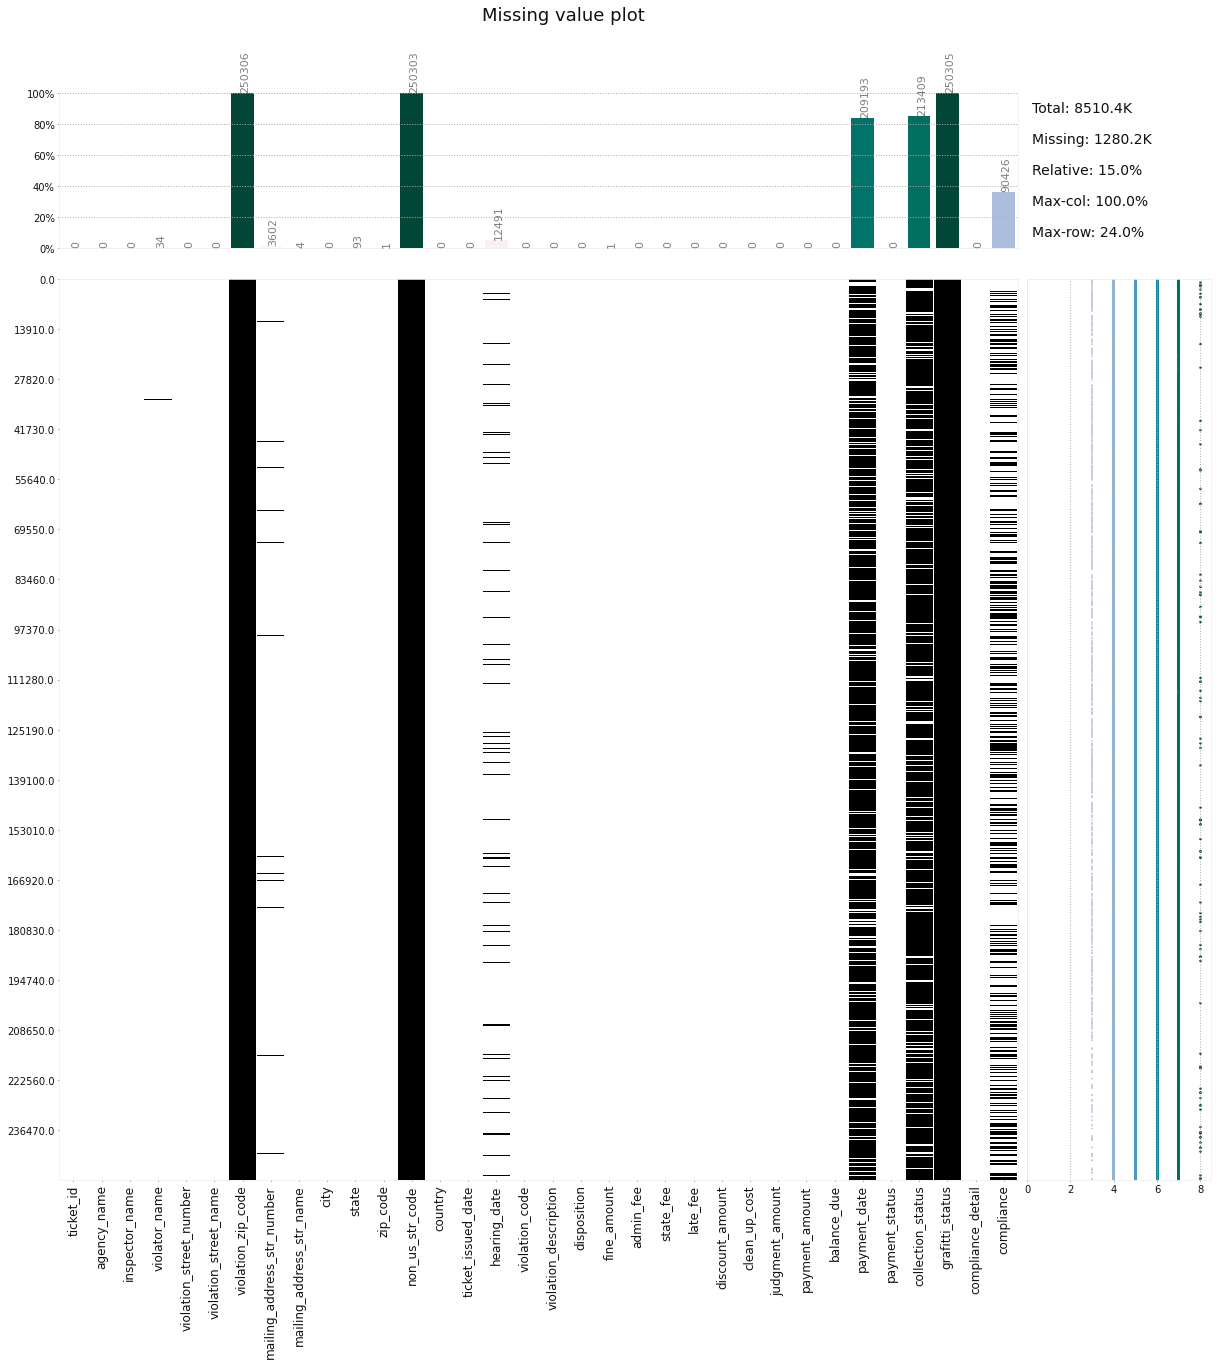

In [14]:
klib.missingval_plot(train_data);

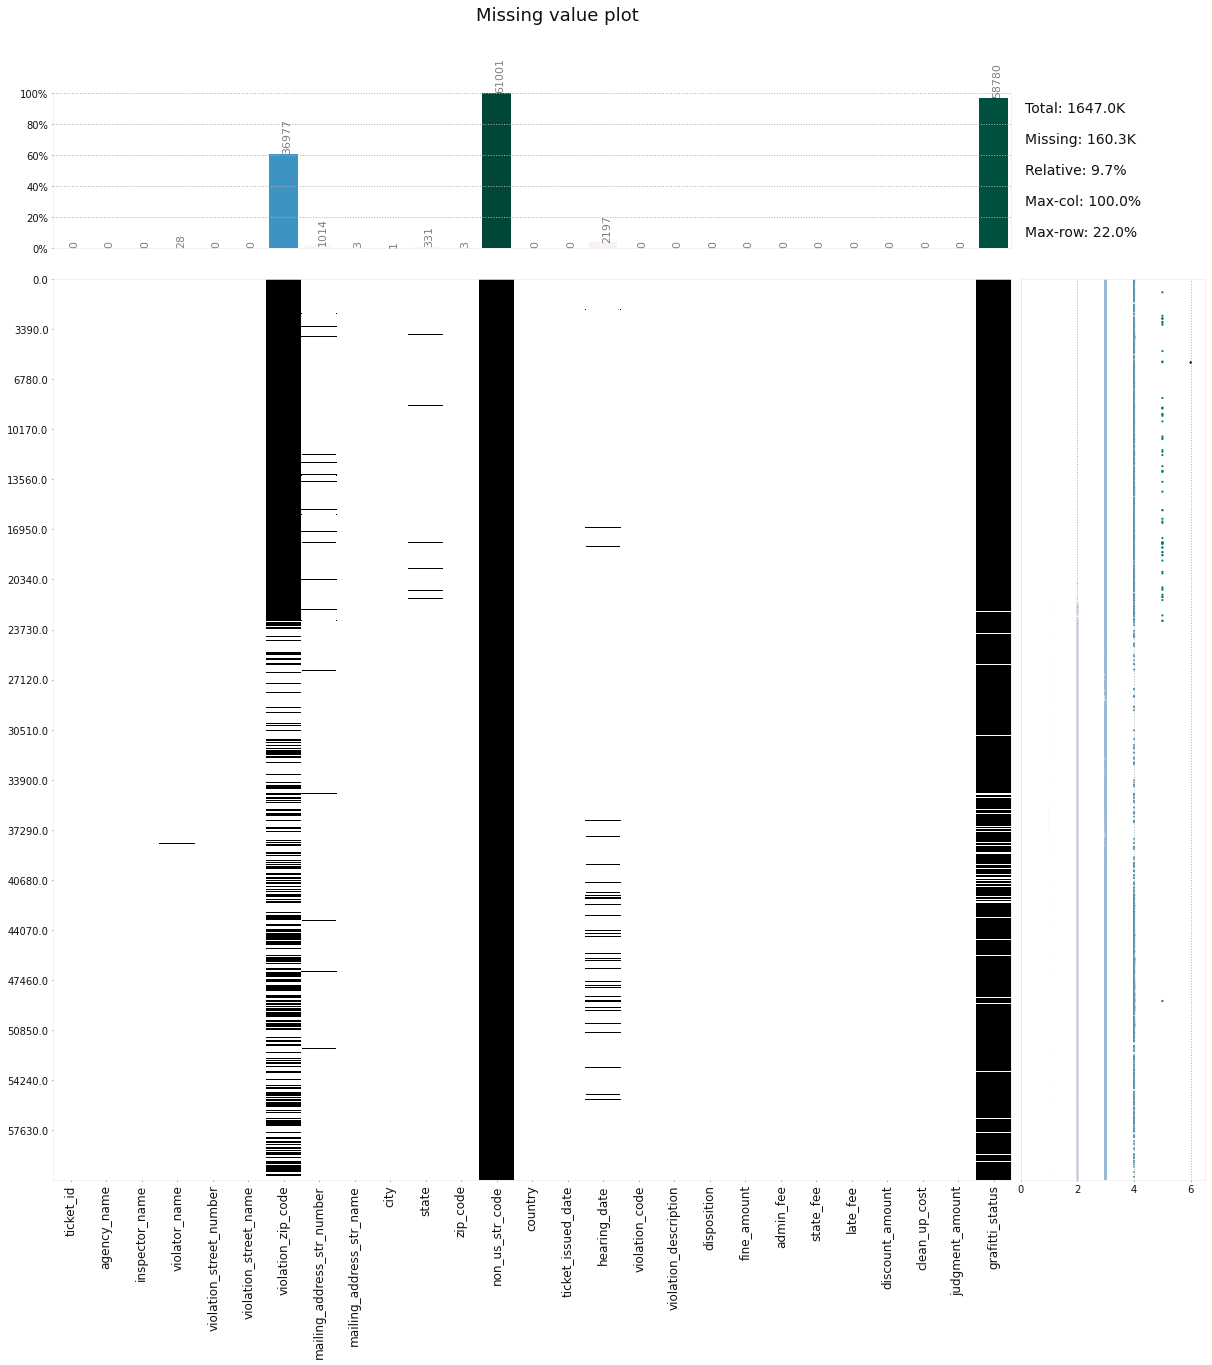

In [15]:
klib.missingval_plot(test_data);

##  Drop columns with significant number of missing values

In [16]:
train_df = train_data.drop(['violation_zip_code','non_us_str_code','grafitti_status','mailing_address_str_number'], axis = 1)
test_df = test_data.drop(['violation_zip_code','non_us_str_code','grafitti_status','mailing_address_str_number'], axis = 1 )

In [17]:
train_df['agency_name'].value_counts()

Buildings, Safety Engineering & Env Department    157784
Department of Public Works                         74717
Health Department                                   8903
Detroit Police Department                           8900
Neighborhood City Halls                                2
Name: agency_name, dtype: int64

In [18]:
test_df['agency_name'].value_counts()

Department of Public Works                        40731
Buildings, Safety Engineering & Env Department    16832
Detroit Police Department                          3438
Name: agency_name, dtype: int64

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


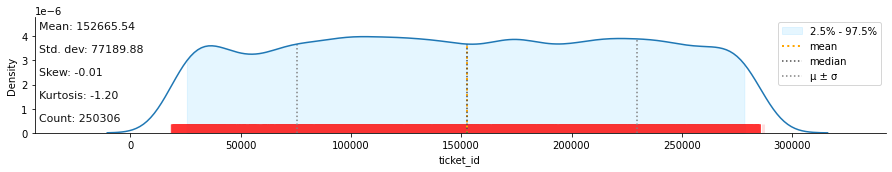

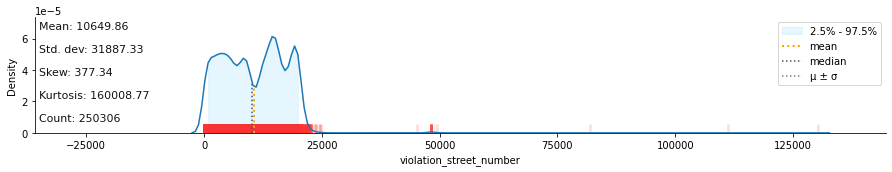

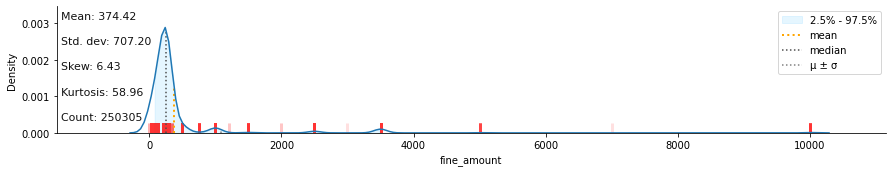

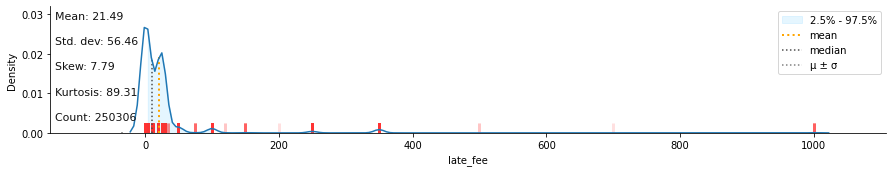

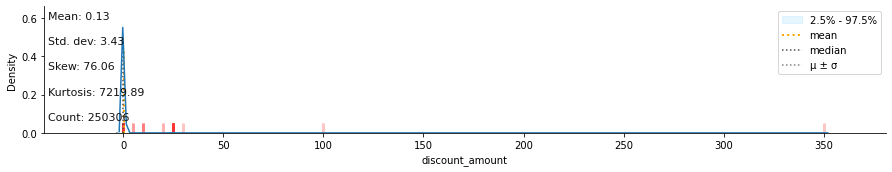

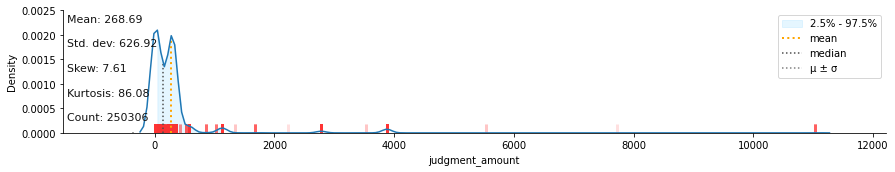

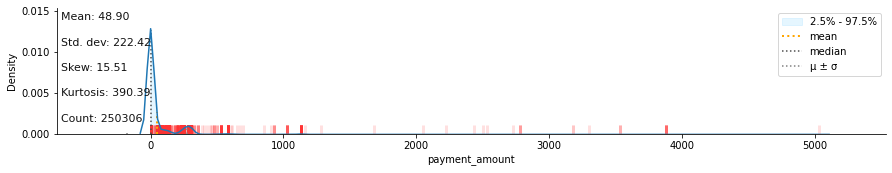

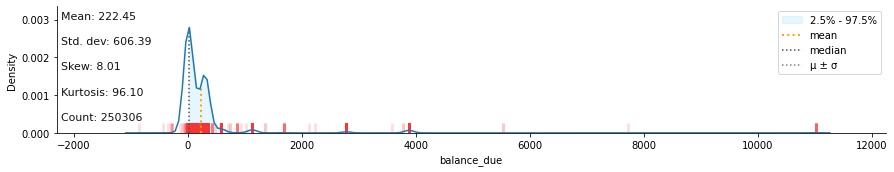

In [19]:
klib.dist_plot(train_df);

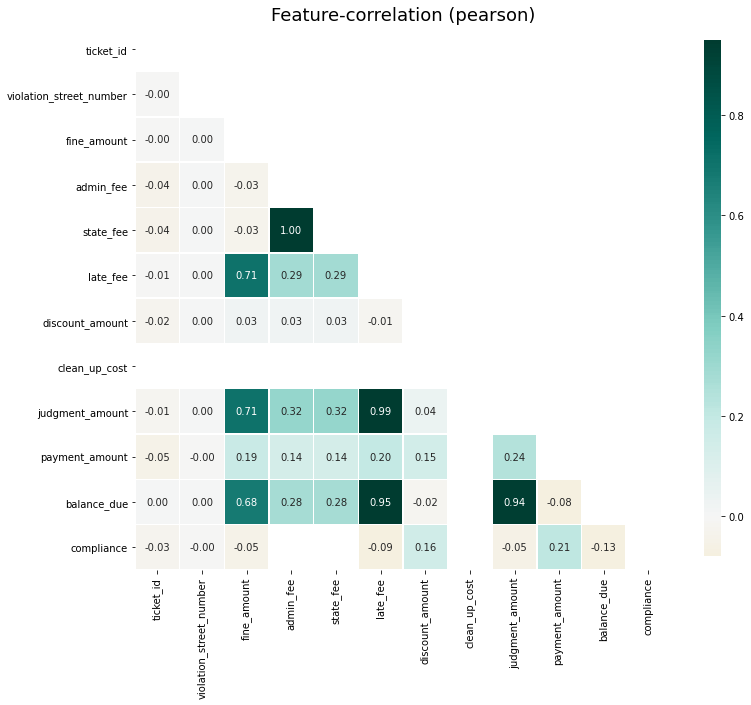

In [20]:
klib.corr_plot(train_df);

In [21]:
train_data1= train_df.dropna(subset = ['compliance'])
test_data1 = test_df.replace(np.NaN,0)

In [22]:
train_data1 = train_data1.set_index('agency_name')
train_data1 =train_data1.drop(['Health Department','Neighborhood City Halls'])
train_data1 = train_data1.reset_index()
train_data1['agency_name'].value_counts()

Buildings, Safety Engineering & Env Department    95863
Department of Public Works                        52445
Detroit Police Department                          4464
Name: agency_name, dtype: int64

In [23]:
y_train1 = train_data1['compliance']
columns_items =['ticket_id','agency_name','late_fee','judgment_amount','fine_amount']
X_train1 = train_data1.loc[:,columns_items]           
X_test1 = test_data1.loc[:,columns_items] 

#Remove nontext characters from following column
columns_encode = ['agency_name']
for ii in columns_encode:
    X_train1.loc[:,ii] = X_train1.loc[:,ii].str.lower()
    X_train1.loc[:,ii] = X_train1.loc[:,ii].str.replace("<", "")
    X_train1.loc[:,ii] = X_train1.loc[:,ii].str.replace("&", " ")
    X_train1.loc[:,ii] = X_train1.loc[:,ii].str.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
    
    X_test1.loc[:,ii] = X_test1.loc[:,ii].str.lower()
    X_test1.loc[:,ii] = X_test1.loc[:,ii].str.replace("<", "")
    X_test1.loc[:,ii] = X_test1.loc[:,ii].str.replace("&", " ")
    X_test1.loc[:,ii] = X_test1.loc[:,ii].str.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [24]:
X_train1.isna().any(), X_test1.isna().any()

(ticket_id          False
 agency_name        False
 late_fee           False
 judgment_amount    False
 fine_amount        False
 dtype: bool, ticket_id          False
 agency_name        False
 late_fee           False
 judgment_amount    False
 fine_amount        False
 dtype: bool)

# Label Encoder

In [25]:
#Creating initial Dataframe
le= LabelEncoder()

#Assigning numerical values and assigning in another columns
X_train1['agency_name_le'] = le.fit_transform(X_train1['agency_name'])
#X_train1['disposition_le'] = le.fit_transform(X_train1['disposition'])

X_test1['agency_name_le'] = le.fit_transform(X_test1['agency_name'])
#X_test1['disposition_le'] = le.fit_transform(X_test1['disposition'])

# OneHotEncoder

In [26]:
#Create instances of Onehotencoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

#For train, passing agency_name columns (label encoded values of agency_name)
ohe_agency = pd.DataFrame(ohe.fit_transform(X_train1[['agency_name_le']]).toarray())
list_agency_names =['buildings safety engineering   env department', 'department of public works',
                    'detroit police department']
ohe_agency.columns = list_agency_names
X_train1 = X_train1.join(ohe_agency, on = 'agency_name_le')
# passing disposition columns (label encoded values of disposition)
# ohe_disposition = pd.DataFrame(ohe.fit_transform(X_train1[['disposition_le']]).toarray())
# list_disposition = ['responsible by default', 'responsible by admission','responsible by determination','responsible fine waived by deter']
# ohe_disposition.columns = list_disposition                                
# X_train1 = X_train1.join(ohe_disposition, on ='disposition_le')
# X_train1 = X_train1.drop(['agency_name','agency_name_le','disposition','disposition_le'], axis =1)
X_train1 = X_train1.drop(['agency_name','agency_name_le'], axis =1)


#For test, passing agency_name columns (label encoded values of agency_name)
ohe_agency_test = pd.DataFrame(ohe.fit_transform(X_test1[['agency_name_le']]).toarray())
ohe_agency_test.columns = list_agency_names
X_test1 = X_test1.join(ohe_agency_test, on = 'agency_name_le')
# passing disposition columns (label encoded values of disposition)
# ohe_disposition_test = pd.DataFrame(ohe.fit_transform(X_test1[['disposition_le']]).toarray())
# ohe_disposition_test.columns = list_disposition                                
# X_test1 = X_test1.join(ohe_disposition_test, on ='disposition_le')
# X_test1 = X_test1.drop(['agency_name','agency_name_le','disposition','disposition_le'], axis = 1)
X_test1 = X_test1.drop(['agency_name','agency_name_le'], axis = 1)

In [27]:
X_train1.shape,X_test1.shape

((152772, 7), (61001, 7))

In [28]:
X_train1=X_train1.set_index('ticket_id')
X_test1=X_test1.set_index('ticket_id')

X_train2 = X_train1  
y_train2 = y_train1
X_test2 = X_test1

In [29]:
X_train2.isna().any().any(),X_test2.isna().any().any()

(False, False)

In [30]:
y_train2.isna().any()

False

In [31]:
X_train1.head()

,late_fee,judgment_amount,fine_amount,buildings safety engineering env department,department of public works,detroit police department
ticket_id,,,,,,
22056,25.0,305.0,250.0,1.0,0.0,0.0
27586,75.0,855.0,750.0,1.0,0.0,0.0
22046,25.0,305.0,250.0,1.0,0.0,0.0
18738,75.0,855.0,750.0,1.0,0.0,0.0
18735,10.0,140.0,100.0,1.0,0.0,0.0


# Gradient-boosted Decision Tree 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train2, y_train2, random_state = 0)

gb = GradientBoostingClassifier()
gb.fit(X_train3, y_train3)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(gb.score(X_train3, y_train3)))
print('Accuracy of GBDT classifier on validation set: {:.2f}'
     .format(gb.score(X_val3, y_val3)))

y_predicted = gb.predict(X_val3)
accuracy1 = accuracy_score(y_val3, y_predicted )
precision1 = precision_score(y_val3, y_predicted)
recall1 = recall_score(y_val3, y_predicted)
confusion_maxtrix1 =confusion_matrix(y_val3, y_predicted)

print("Precison score of GBDT classifier: {:2f}".format(precision1))
print("Recall score of GBDT classifier: {:2f}".format(recall1))


y_score_gb = gb.fit(X_train3, y_train3).decision_function(X_val3)
fpr_gb, tpr_gb, _ = roc_curve(y_val3, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("AUC score of GBDT classifier: {:2f}".format(roc_auc_gb ))

Accuracy of GBDT classifier on training set: 0.93
Accuracy of GBDT classifier on validation set: 0.93
Precison score of GBDT classifier: 0.953488
Recall score of GBDT classifier: 0.014996
AUC score of GBDT classifier: 0.750789


In [33]:
prediction_list_gb = gb.predict_proba(X_test2)[:,0]
prediction_list_gb

array([0.9382545 , 0.97527055, 0.93051193, ..., 0.93051193, 0.93051193,
       0.66983803])

In [34]:
list1= np.array([X_test2.index, prediction_list_gb])
final_result =pd.DataFrame(list1).T
result1 = final_result.rename(columns = {0: 'ticket_id', 1: ' '})
result2 = result1.set_index('ticket_id')
result2

,
ticket_id,
284932.0,0.938254
285362.0,0.975271
285361.0,0.930512
285338.0,0.938254
285346.0,0.930512
...,...
376496.0,0.975271
376497.0,0.975271
376499.0,0.930512


# Random Forests 

In [35]:
from sklearn.ensemble import RandomForestClassifier

X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train2, y_train2,
                                                   random_state = 0)
rf = RandomForestClassifier( random_state = 0).fit(X_train4, y_train4)

print('Accuracy of Random Forests classifier on training set: {:.2f}'
     .format(rf.score(X_train4, y_train4)))
print('Accuracy of Random Forests classifier on validation set: {:.2f}'
     .format(rf.score(X_val4, y_val4)))

y_predicted = rf.predict(X_val4)
accuracy1 = accuracy_score(y_val4, y_predicted )
precision1 = precision_score(y_val4, y_predicted)
recall1 = recall_score(y_val4, y_predicted)
confusion_maxtrix1 =confusion_matrix(y_val4, y_predicted)


print("Precison score of Random Forests classifier: {:2f}".format(precision1))
print("Recall score of Random Forests classifier: {:2f}".format(recall1))


y_score_rf = rf.fit(X_train4, y_train4).predict(X_val4)
fpr_rf, tpr_rf, _ = roc_curve(y_val4, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print("AUC score of Random Forests classifier: {:2f}".format(roc_auc_rf ))

Accuracy of Random Forests classifier on training set: 0.93
Accuracy of Random Forests classifier on validation set: 0.93
Precison score of Random Forests classifier: 0.698630
Recall score of Random Forests classifier: 0.018654
AUC score of Random Forests classifier: 0.509017


In [36]:
X_test2.isna().any()

late_fee                                         False
judgment_amount                                  False
fine_amount                                      False
buildings safety engineering   env department    False
department of public works                       False
detroit police department                        False
dtype: bool

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train.csv', engine = 'python')
test_data = pd.read_csv('test.csv', engine = 'python')

def blight_model():
    #Load Dataset
    train_data = pd.read_csv('train.csv', engine = 'python')
    test_data = pd.read_csv('test.csv', engine = 'python')

    # Cleaning Nan Values 
    train_data1= train_data.dropna(subset = ['compliance'])
    test_data1 = test_data.replace(np.NaN,0.0)

     #Compliance is the target variable
    y_train1 = train_data1['compliance']

    #Selecting important feature variables
    columns_items =['ticket_id',
                    'judgment_amount', 'fine_amount', 'discount_amount']
    X_train1 = train_data1.loc[:,columns_items]           
    X_test1 = test_data1.loc[:,columns_items] 

     #Set ticket_id as new index 
    X_train1=X_train1.set_index('ticket_id')
    X_test1=X_test1.set_index('ticket_id')

    X_train2 = X_train1  
    y_train2 = y_train1
    X_test2 = X_test1

    #Gradient-boosted Decision Tree
    X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train2, y_train2, random_state = 0)

    gb = GradientBoostingClassifier(max_depth = 6)
    gb.fit(X_train3, y_train3)

    print('Accuracy of GBDT classifier on training set: {:.2f}'
         .format(gb.score(X_train3, y_train3)))
    print('Accuracy of GBDT classifier on validation set: {:.2f}'
         .format(gb.score(X_val3, y_val3)))

    y_predicted = gb.predict(X_val3)
    accuracy1 = accuracy_score(y_val3, y_predicted )
    precision1 = precision_score(y_val3, y_predicted)
    recall1 = recall_score(y_val3, y_predicted)
    confusion_maxtrix1 =confusion_matrix(y_val3, y_predicted)

    print("Precison score of GBDT classifier: {:2f}".format(precision1))
    print("Recall score of GBDT classifier: {:2f}".format(recall1))


    y_score_gb = gb.fit(X_train3, y_train3).decision_function(X_val3)
    fpr_gb, tpr_gb, _ = roc_curve(y_val3, y_score_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    print("AUC score of GBDT classifier: {:2f}".format(roc_auc_gb ))

    #Prediction on test data using Gradient-boosted Decision Tree
    prediction_list_gb = gb.predict_proba(X_test2)[:,1]
    list1= np.array([X_test2.index, prediction_list_gb])
    final_result =pd.DataFrame(list1).T
    result1 = final_result.rename(columns = {0: 'ticket_id', 1: ' '})
    result2 = result1.set_index('ticket_id')
    return result2
blight_model()

Accuracy of GBDT classifier on training set: 0.94
Accuracy of GBDT classifier on validation set: 0.93
Precison score of GBDT classifier: 0.951299
Recall score of GBDT classifier: 0.101314
AUC score of GBDT classifier: 0.754169


,
ticket_id,
284932.0,0.062010
285362.0,0.024081
285361.0,0.070164
285338.0,0.062010
285346.0,0.070164
...,...
376496.0,0.024081
376497.0,0.024081
376499.0,0.070164


In [38]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train.csv', engine = 'python')
test_data = pd.read_csv('test.csv', engine = 'python')

def blight_model():
    #Load Dataset
    train_data = pd.read_csv('train.csv', engine = 'python')
    test_data = pd.read_csv('test.csv', engine = 'python')

    # Cleaning Nan Values 
    train_data1= train_data.dropna(subset = ['compliance'])
    test_data1 = test_data.replace(np.NaN,0.0)

     #Compliance is the target variable
    y_train1 = train_data1['compliance']
                   # 'late_fee','admin_fee', 'state_fee',

    #Selecting important feature variables
    columns_items =['ticket_id',
                    'judgment_amount', 'fine_amount', 'discount_amount']
    X_train1 = train_data1.loc[:,columns_items]           
    X_test1 = test_data1.loc[:,columns_items] 

     #Set ticket_id as new index 
    X_train1=X_train1.set_index('ticket_id')
    X_test1=X_test1.set_index('ticket_id')

    X_train2 = X_train1  
    y_train2 = y_train1
    X_test2 = X_test1

    #Random Forests classifier 
    X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train2, y_train2,
                                                   random_state = 0)
    rf = RandomForestClassifier(n_estimators = 200, max_depth = 6, random_state = 0).fit(X_train4, y_train4)

    #print('Accuracy of Random Forests classifier on training set: {:.2f}'
       #  .format(rf.score(X_train4, y_train4)))
    #print('Accuracy of Random Forests classifier on validation set: {:.2f}'
     #    .format(rf.score(X_val4, y_val4)))

    y_predicted = rf.predict(X_val4)
    accuracy1 = accuracy_score(y_val4, y_predicted )
    precision1 = precision_score(y_val4, y_predicted)
    recall1 = recall_score(y_val4, y_predicted)
    confusion_maxtrix1 =confusion_matrix(y_val4, y_predicted)


    #print("Precison score of Random Forests classifier: {:2f}".format(precision1))
    #print("Recall score of Random Forests classifier: {:2f}".format(recall1))


    y_score_rf = rf.fit(X_train4, y_train4).predict(X_val4)
    fpr_rf, tpr_rf, _ = roc_curve(y_val4, y_score_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    #print("AUC score of Random Forests classifier: {:2f}".format(roc_auc_rf ))

    #Prediction on test data using Gradient-boosted Decision Tree
    prediction_list_rf = rf.predict_proba(X_test2)[:,1]
    list1= np.array([X_test2.index, prediction_list_rf])
    final_result =pd.DataFrame(list1).T
    result1 = final_result.rename(columns = {0: 'ticket_id', 1: ' '})
    result2 = result1.set_index('ticket_id')
    return result2